In [7]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [8]:
# Dataset que l'on va utiliser pour prédire le prix d'un diamant
data = pd.read_csv('datasets/diamonds.csv', index_col = 0)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
data.shape

(53940, 10)

In [10]:
# Le dataset est assez gros, on traivalle au départ sur une partie
data = data.sample(frac=0.2)
data.shape

(10788, 10)

In [12]:
# Comme on a fractionné, on reset les index
data.reset_index(inplace = True, drop = True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.30,Very Good,E,VS1,61.7,56.0,755,4.30,4.33,2.66
1,0.40,Premium,D,SI1,61.4,56.0,990,4.83,4.72,2.93
2,0.34,Premium,D,SI2,59.2,59.0,650,4.58,4.54,2.70
3,0.30,Ideal,G,VVS2,61.5,56.0,878,4.34,4.31,2.66
4,1.50,Very Good,I,VS2,63.3,55.0,9533,7.30,7.26,4.61


In [14]:
# On affiche la matrice de corrélation entre les paramètres pour voir comment les différents
# Paramètres sont corrélés entre eux
correlation = data.corr()

correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.030839,0.191858,0.917965,0.977451,0.951328,0.967779
depth,0.030839,1.000000,-0.289601,-0.017475,-0.025352,-0.028298,0.099542
table,0.191858,-0.289601,1.000000,0.133074,0.208474,0.194637,0.164871
price,0.917965,-0.017475,0.133074,1.000000,0.885478,0.864747,0.872399
x,0.977451,-0.025352,0.208474,0.885478,1.000000,0.973088,0.982635
y,0.951328,-0.028298,0.194637,0.864747,0.973088,1.000000,0.963199
z,0.967779,0.099542,0.164871,0.872399,0.982635,0.963199,1.000000


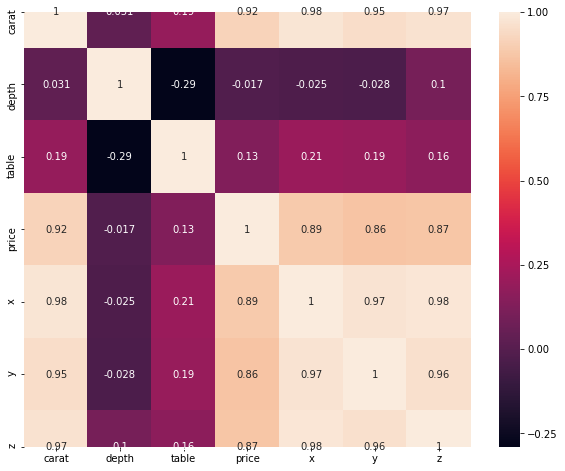

In [21]:
# Pour afficher une matrice de correlation, le meilleur moyen de procéder est d'utiliser une heatmap
#Le bib seaborn le fait bien
plt.subplots(figsize=(10,8))
sns.heatmap(correlation, annot=True)

plt.show()

In [22]:
# On extrait dans le dataset les types de coupes que l'on a 
data['cut'].unique()

array(['Very Good', 'Premium', 'Ideal', 'Good', 'Fair'], dtype=object)

In [24]:
# Idem pour les couleurs et la clareté
data['color'].unique()


array(['VS1', 'SI1', 'SI2', 'VVS2', 'VS2', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [25]:
data['clarity'].unique()

array(['VS1', 'SI1', 'SI2', 'VVS2', 'VS2', 'VVS1', 'IF', 'I1'],
      dtype=object)

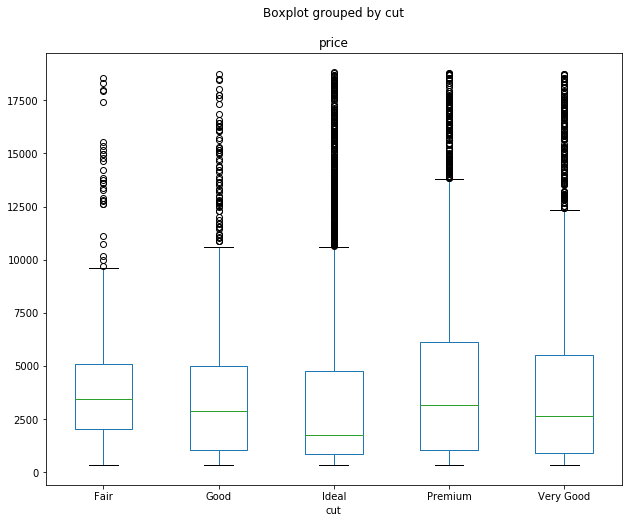

In [26]:
# Pour comprendre la corrélation entre la coupe et le prix, on utilise une boxplot.
# En effet, sur la heatmap on a que les valeurs numérique qui ont pu être comparées
data.boxplot(by = 'cut', column =['price'], grid = False, figsize = (10,8))

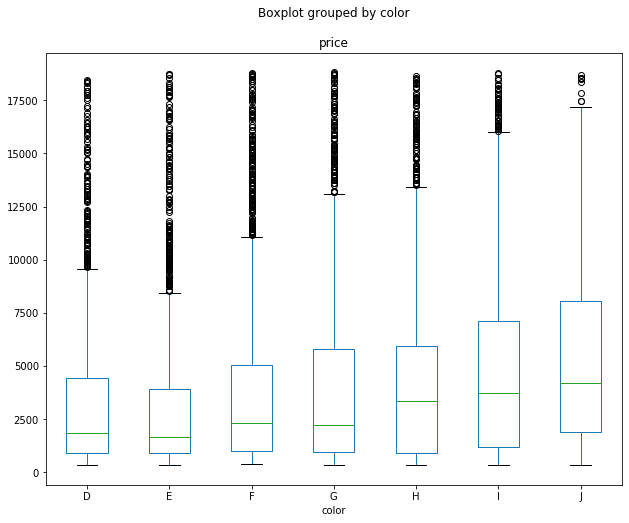

In [27]:
# Même opération pour la couleur
data.boxplot(by = 'color', column =['price'], grid = False, figsize = (10,8))

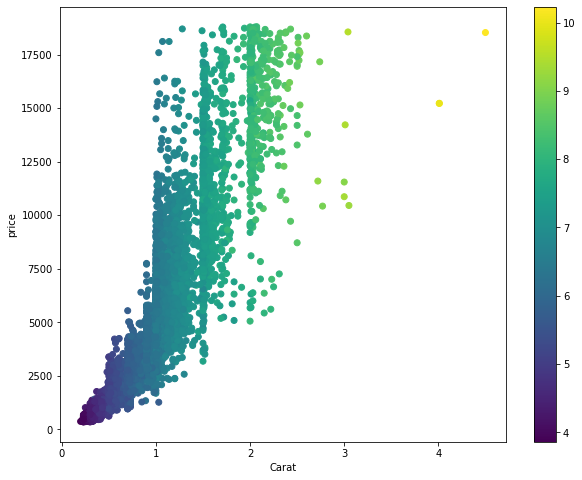

In [36]:
# On affiche maintenant la relation entre les carats et le prix
# On a 2 float donc on utilise en scatter plot
# Par ailleurs on sait déja qu'ils sont assez corrélés car la heatmap nous a donné 0.92 de corrélation
plt.subplots(figsize=(10,8))
# On ajoute la couleur sur x parce que c'est classe
plt.scatter(data['carat'], data['price'], c=data['x'])

plt.xlabel("Carat")
plt.ylabel("price")

plt.colorbar();  # show color scale

plt.show()

In [37]:
# Il est tres difficile pour les algo de ML de travailler avec des string
# On va convertir ces strings en int ou float par 2 moyens différents
# Le premier c'est de faire un dictionnaire avec l'ensemble des valeurs existantes
# Pour la clareté par exemple 
clarity_dict = {"IF" : 7, "VVS1" : 6, "VVS2" : 5, "VS1" : 4, "VS2" : 3, "SI1" : 2, "SI2" : 1, "I1" :0}
data['clarity'].replace(clarity_dict, inplace = True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.30,Very Good,E,4,61.7,56.0,755,4.30,4.33,2.66
1,0.40,Premium,D,2,61.4,56.0,990,4.83,4.72,2.93
2,0.34,Premium,D,1,59.2,59.0,650,4.58,4.54,2.70
3,0.30,Ideal,G,5,61.5,56.0,878,4.34,4.31,2.66
4,1.50,Very Good,I,3,63.3,55.0,9533,7.30,7.26,4.61


In [38]:
# La deuxieme méthode consiste a ajouter autant de colonnes que de valeurs possibles
# Puis d'entrer 1 dans la colonne correpondante pour chaque ligne 
# La méthode dummies s'occupe de ca, cette méthode s'appelle le 'hot encoding'
data = pd.get_dummies(data, columns=['cut', 'color'])

data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,4,61.7,56.0,755,4.30,4.33,2.66,0,0,0,0,1,0,1,0,0,0,0,0
1,0.40,2,61.4,56.0,990,4.83,4.72,2.93,0,0,0,1,0,1,0,0,0,0,0,0
2,0.34,1,59.2,59.0,650,4.58,4.54,2.70,0,0,0,1,0,1,0,0,0,0,0,0
3,0.30,5,61.5,56.0,878,4.34,4.31,2.66,0,0,1,0,0,0,0,0,1,0,0,0
4,1.50,3,63.3,55.0,9533,7.30,7.26,4.61,0,0,0,0,1,0,0,0,0,0,1,0


In [39]:
# Le reste de nos datas sont numériques mais on a un soucis
# L'échelle de variation de chacun de ses paramètres est trop variées
# Les moyennes et écart types sont trop éloignés d'un paramètres à l'autre
# On va utiliser une technique pour rapprocher tout ca 
NUMERIC_FEATURES = ['carat', 'depth', 'table', 'x', 'y', 'z']

numeric_df = data[NUMERIC_FEATURES]

# La fonction describe est très utile pour obtenir rapidement des données sur un dataframe
numeric_df.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.799740,61.757610,57.490888,5.733981,5.737820,3.539478
std,0.478259,1.474396,2.304076,1.125734,1.145908,0.699027
min,0.200000,50.800000,43.000000,3.860000,3.840000,0.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000
max,4.500000,79.000000,95.000000,10.230000,31.800000,6.720000


In [41]:
# La technique est la standardisation des données : pour chaque donnée on soustrait la moyenne
# puis on divise par l'écart type
# La fonction scale fait tout ca pour nous
from sklearn.preprocessing import scale

numeric_array = scale(numeric_df)

numeric_array[:5]

array([[-1.0449626 , -0.03907565, -0.6470955 , -1.2738785 , -1.22861984,
        -1.25820484],
       [-0.83586115, -0.24255826, -0.6470955 , -0.80305254, -0.88826255,
        -0.87193565],
       [-0.96132202, -1.73476403,  0.65500531, -1.02514026, -1.04535053,
        -1.20097978],
       [-1.0449626 , -0.17473072, -0.6470955 , -1.23834446, -1.24607406,
        -1.25820484],
       [ 1.46425481,  1.04616491, -1.08112911,  1.39117408,  1.32842342,
         1.53151712]])

In [45]:
# On converti maintenant ce tableau dans un dataframe
# En effet la sortie de scale est un tableau et pas un data frame
numeric_df = pd.DataFrame(numeric_array, columns=numeric_df.columns)

numeric_df.describe()

,carat,depth,table,x,y,z
count,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04
mean,1.845329e-16,3.744420e-15,2.774608e-15,-2.368538e-17,-6.724835e-16,4.331599e-17
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.254064e+00,-7.432277e+00,-6.289532e+00,-1.664753e+00,-1.656248e+00,-5.063672e+00
25%,-8.358611e-01,-4.460409e-01,-6.470955e-01,-9.096546e-01,-8.882625e-01,-9.005482e-01
50%,-2.085568e-01,2.875188e-02,-2.130619e-01,-3.907080e-02,-3.300576e-02,-2.786592e-02
75%,5.232983e-01,5.035446e-01,6.550053e-01,7.160274e-01,7.000715e-01,7.160599e-01
max,7.737298e+00,1.169509e+01,1.628022e+01,3.994042e+00,2.274475e+01,4.550139e+00


In [46]:
# On remplace les données de notre DataFrame initiale avec les données standardisées
# La fonction drop enlève les colonnes
data.drop(NUMERIC_FEATURES, inplace = True, axis = 1)

data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,4,755,0,0,0,0,1,0,1,0,0,0,0,0
1,2,990,0,0,0,1,0,1,0,0,0,0,0,0
2,1,650,0,0,0,1,0,1,0,0,0,0,0,0
3,5,878,0,0,1,0,0,0,0,0,1,0,0,0
4,3,9533,0,0,0,0,1,0,0,0,0,0,1,0


In [47]:
# On concatène les données
data = pd.concat([data, numeric_df], axis=1)

data.shape

(10788, 20)

In [48]:
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,4,755,0,0,0,0,1,0,1,0,0,0,0,0,-1.044963,-0.039076,-0.647096,-1.273878,-1.228620,-1.258205
1,2,990,0,0,0,1,0,1,0,0,0,0,0,0,-0.835861,-0.242558,-0.647096,-0.803053,-0.888263,-0.871936
2,1,650,0,0,0,1,0,1,0,0,0,0,0,0,-0.961322,-1.734764,0.655005,-1.025140,-1.045351,-1.200980
3,5,878,0,0,1,0,0,0,0,0,1,0,0,0,-1.044963,-0.174731,-0.647096,-1.238344,-1.246074,-1.258205
4,3,9533,0,0,0,0,1,0,0,0,0,0,1,0,1.464255,1.046165,-1.081129,1.391174,1.328423,1.531517


In [49]:
# On enregistre notre dataset bien trié et pré-processed.csv
data.to_csv('datasets/diamonds_processed.csv', index = False)

In [52]:
# On peut process des commandes windows shell avec le ! 
!dir datasets

 Le volume dans le lecteur O n'a pas de nom.
 Le num‚ro de s‚rie du volume est 00F6-603F

 R‚pertoire de O:\Capitalisation_NME\Python\MachineLearning\Jupyter\datasets

02/12/2019  13:55    <DIR>          .
02/12/2019  13:55    <DIR>          ..
25/08/2019  20:40         5ÿ057ÿ493 bbc-text.csv
25/08/2019  20:40            18ÿ846 boston_data.csv
25/08/2019  20:40             8ÿ724 cars.csv
25/08/2019  20:40         3ÿ192ÿ560 diamonds.csv
03/12/2019  09:02         1ÿ614ÿ313 diamonds_processed.csv
25/08/2019  20:40           747ÿ025 gender_voice_dataset.csv
25/08/2019  20:40            91ÿ065 german_credit_data_dataset.csv
25/08/2019  20:40             3ÿ981 Mall_Customers.csv
25/08/2019  20:40            10ÿ782 wine.csv
25/08/2019  20:40             6ÿ148 _DS_Store
              10 fichier(s)       10ÿ750ÿ937 octets
               2 R‚p(s)  82ÿ653ÿ687ÿ808 octets libres


In [56]:
# Notre data est enfin prête ! 
# On envoie le modèle de regression linéaire

# On commence par séparer la data en 2 datasets train et test
from sklearn.model_selection import train_test_split

X = data.drop('price', axis = 1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [57]:
# On a séparé notre data set, on entraine le modele avec fit
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# On se sert de notre modèle pour faire des prédictions sur le test
y_prediction = linear_regression.predict(x_test)

y_prediction

array([ 5585.31504606,  -479.44360114,  4350.33539865, ...,
       10154.79834671,  9708.8909203 ,  9373.78397218])

In [59]:
# Comme précédement, on utilise le R² score pour mesurer la précision de notre modèle
# On mesure le R² sur notre modèle avec le set de train
train_score = linear_regression.score(x_train, y_train)

print("Training score :", train_score)

Training score : 0.9024781931442011


In [60]:
# Puis on réalise la meme opération avec le set de tests
# C'est un peu différent car il faut mesurer la différence entre notre prédiction et la réalité
# Mais le principe est le meme
from sklearn.metrics import r2_score

score = r2_score(y_test, y_prediction)

print("Testing score :", score)

Testing score : 0.9186995511487116
